In [ ]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)
import scipy as sp

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.8


# Plot proportions

In [ ]:
adata0.obs['CT_rough'] = [x.split('-')[0] for x in adata0.obs.CTv1]

In [ ]:
adata0.obs['CT_rough'].astype('category').cat.categories

Index(['B cell', 'Endo', 'Fibro', 'Gran', 'Macro', 'Mono', 'NK', 'SMC',
       'T cell'],
      dtype='object')

In [ ]:
cat_CTv1 = adata0.obs['CTv1'].astype('category').cat.categories

## Make palette

In [ ]:
import seaborn as sns

unique_items = ['B cell', 'Endo', 'Fibro', 'Gran', 'Macro', 'Mono', 'NK', 'SMC',
       'T cell']  # Example unique items
replicates_per_item = replicates_per_item = [2,4,3,2,1,3,1,4,3]  # Different number of replicates for each item

# Generate a color palette for the unique items
base_palette = sns.color_palette()

import colorsys

def adjust_color_hls(color, factor=0.05):
    """Adjust the lightness of a color."""
    h, l, s = colorsys.rgb_to_hls(*color[:3])
    l = max(min(l - factor, 1.0), 0.0)
    return colorsys.hls_to_rgb(h, l, s)

palette_with_replicates = []
for base_color, num_replicates in zip(base_palette, replicates_per_item):
    # Generate colors for each replicate
    for i in range(num_replicates):
        # Alternate the direction of lightness adjustment for variety
        factor = 0.08*(i+1)
        replicate_color = adjust_color_hls(base_color, factor=factor)
        palette_with_replicates.append(replicate_color)
        

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
ys = [x + i for i in range(sum(replicates_per_item))]

for y, color in zip(ys, palette_with_replicates):
    plt.plot(x, y, color=color)

plt.show()


In [ ]:
palette_with_replicates

In [ ]:
adata0.uns['CTv1_colors']

array(['#196091', '#13496e', '#e46b00', '#bb5800', '#934500', '#6a3200',
       '#1f7d52', '#175d3d', '#0f3c27', '#b32122', '#911a1b', '#9818fb',
       '#71463d', '#57352f', '#3c2520', '#dc55b3', '#a4ad48', '#89903c',
       '#6e7330', '#525724', '#139caa', '#0f7b86', '#0b5961'],
      dtype=object)

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


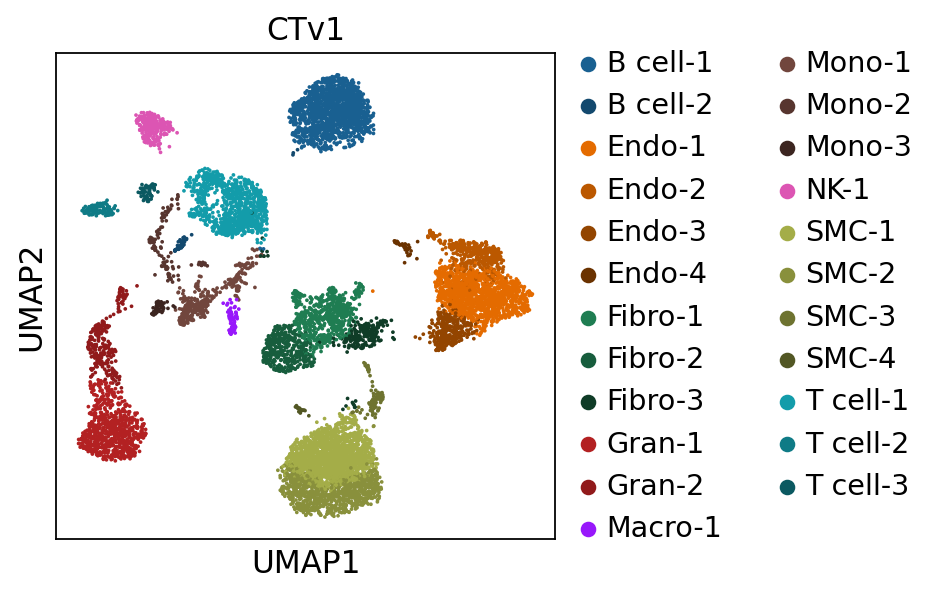

In [ ]:
sc.pl.umap(adata0,color='CTv1')

In [ ]:
adata0 = sc.read('./write/Deng_outer_processed.h5ad')

In [ ]:
adata0.obs.CT_rough.cat.categories

Index(['B cell', 'Endo', 'Fibro', 'Gran', 'Macro', 'Mono', 'NK', 'SMC',
       'T cell'],
      dtype='object')

## Plot in groups

In [ ]:
Immune = adata0[np.in1d(adata0.obs.CT_rough,
                        np.array(['B cell','T cell','Gran','Macro','Mono','NK']))]
NonImmune = adata0[np.in1d(adata0.obs.CT_rough,
                        np.array(['Endo','Fibro','SMC']))]

In [ ]:
#adata = adata0[adata0.obs.Sample.str.startswith('Deng_adv')]
#adata = adata0
#plt.figure(figsize=(10,5))
samp = 'Nonimmune'
adata = Immune if samp=='Immune' else NonImmune
palette1 = ['#196091', '#13496e', 
            '#b32122', '#911a1b', '#9818fb',
       '#71463d', '#57352f', '#3c2520', '#dc55b3', 
            '#139caa', '#0f7b86', '#0b5961']
palette2 = ['#e46b00', '#bb5800', '#934500', '#6a3200',
       '#1f7d52', '#175d3d', '#0f3c27','#a4ad48', '#89903c',
       '#6e7330', '#525724']

tab = pd.crosstab(adata.obs['Sample'],adata.obs['CTv1'], normalize=0)*100
ax = tab.plot.bar(stacked=True,
                  color=palette1 if samp=='Immune' else palette2
                 )
ax.grid(False)
ax.set_ylabel('%')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig = plt.gcf()
fig.set_size_inches(5,10)

plt.savefig(f'./figures/Deng_CT_{samp}.png',bbox_inches='tight')
plt.savefig(f'./figures/Deng_CT_{samp}.pdf',bbox_inches='tight')

In [ ]:
tab2 = round(tab)

In [ ]:
tab2

CTv1,B cell-1,B cell-2,Endo-1,Endo-2,Endo-3,Endo-4,Fibro-1,Fibro-2,Fibro-3,Gran-1,...,Mono-2,Mono-3,NK-1,SMC-1,SMC-2,SMC-3,SMC-4,T cell-1,T cell-2,T cell-3
Sample,,,,,,,,,,,,,,,,,,,,,
Deng_adv_apoe,22.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,3.0,20.0,...,2.0,1.0,5.0,0.0,0.0,0.0,0.0,14.0,2.0,1.0
Deng_adv_wt,34.0,1.0,0.0,0.0,0.0,0.0,13.0,7.0,4.0,3.0,...,2.0,1.0,4.0,0.0,0.0,1.0,0.0,18.0,1.0,1.0
Deng_me_apoe,0.0,0.0,32.0,9.0,7.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,31.0,17.0,2.0,0.0,0.0,0.0,0.0
Deng_me_wt,0.0,0.0,23.0,7.0,6.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,40.0,20.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
cat_CTv1 = adata.obs.CTv1.cat.categories

In [ ]:
ax = sns.heatmap(tab.T,annot=True,cmap="coolwarm",
            yticklabels=cat_CTv1)
ax.set_ylabel('%')
fig = plt.gcf()
fig.set_size_inches(5,10)
plt.savefig('./figures/Deng_CT_htmap.png',bbox_inches='tight')
plt.savefig('./figures/Deng_CT_htmap.pdf',bbox_inches='tight')

In [ ]:
adata[adata0.obs.Sample.str.startswith('Deng_adv')]
tab = pd.crosstab(adata.obs['Sample'],adata.obs['CTv1'], normalize=0)*100
ax = tab.plot.bar(stacked=True)
ax.grid(False)
ax.set_ylabel('%')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Deng_CT_Immune.png',bbox_inches='tight'),

In [ ]:
adata.obs.CTv1[adata.obs.CTv1.cat.str.startswith('Endo')]
adata1 = adata[Endoidx]
tab = pd.crosstab(adata1.obs['Sample'],adata1.obs['CTv1'], normalize=0)*100
ax = tab.plot.bar(stacked=True)
ax.grid(False)
ax.set_ylabel('%')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('CT_endo.png',bbox_inches='tight')

# Plot ligand-receptor expression in different samples

In [ ]:
GTs = ['ApoE','WT']
gl = ['Sell','Cd34']
for GT in GTs:
    sc.pl.umap(adata[adata.obs.Genotype==GT], color=gl,legend_loc='on data',cmap=cmap,
               vmin=0,vmax=5,vcenter=2.5,
          #title=[f"{gl[0]}_{GT}",f"{gl[1]}_{GT}",f"{gl[2]}_{GT}"],
          title=[f"{gl[0]}_{GT}",f"{gl[1]}_{GT}"],
          save=f"_Deng_Markers_{gl[0]}_{gl[1]}_{GT}.png"
          )

In [ ]:
adata

AnnData object with n_obs × n_vars = 10695 × 8846
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'phase', 'S_score', 'G2M_score', 'Age', 'Genotype', 'CellType', 'StudyID', 'Tissue', 'Sample', 'doublet', 'dbscore', 'n_genes', 'batch', 'Leiden_v1', 'CTv1', 'CT_rough', 'GT_CT'
    var: 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'n_cells_by_counts-3', 'mean_counts-3

<Figure size 320x320 with 0 Axes>

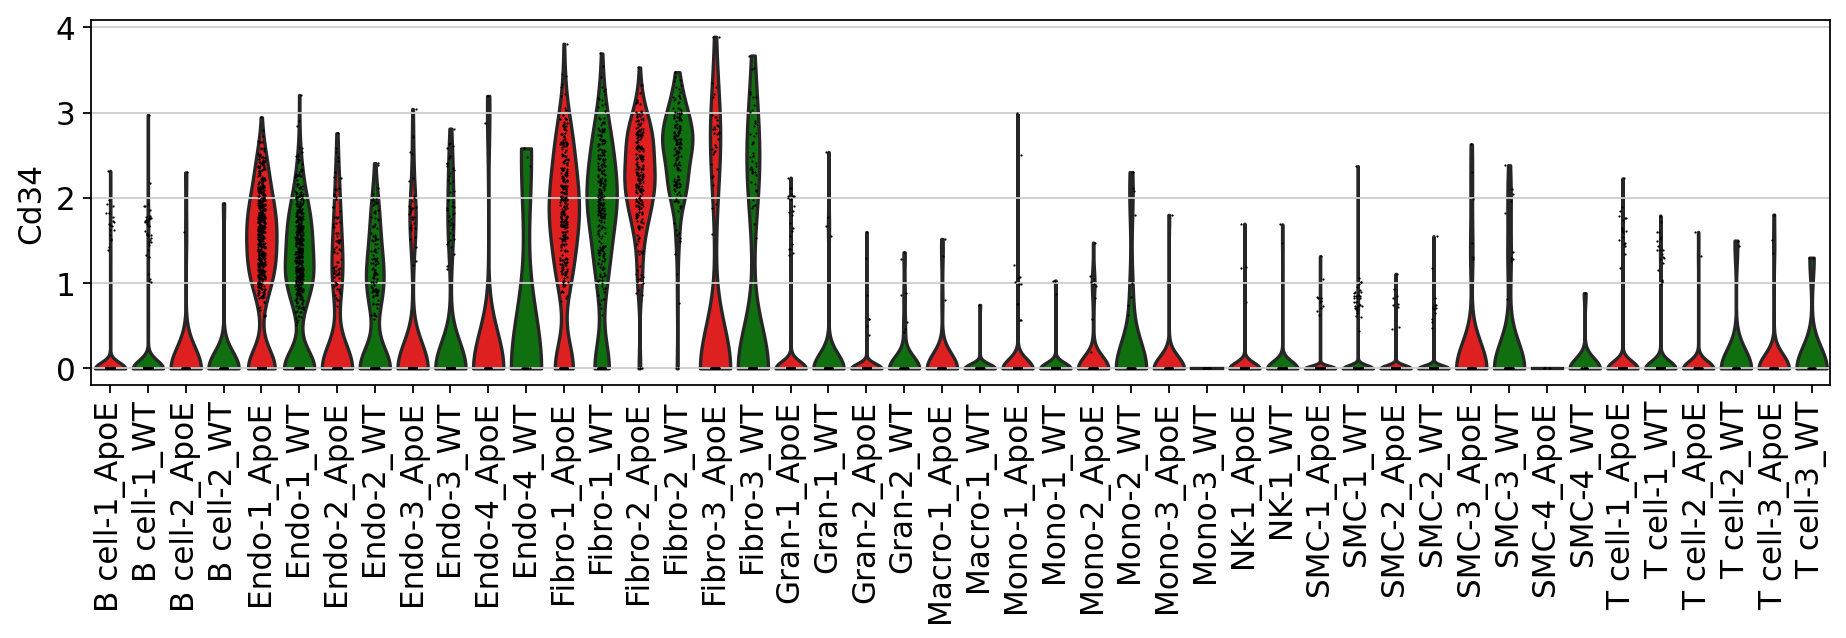

In [ ]:
key = 'Cd34'
adata.obs['GT_CT'] = adata.obs['CTv1'].astype('str')+'_'+adata.obs['Genotype'].astype('str')
plt.figure()
sc.pl.violin(adata,keys=[key],groupby='GT_CT',show=False,rotation=90,
            palette=['red','green']*len(adata.obs.CTv1.cat.categories))
fig = plt.gcf()
fig.set_size_inches(18,3)
plt.savefig(f'./figures/Deng_{key}.png',bbox_inches='tight')
plt.savefig(f'./Files/pdf_backup/Deng_{key}.pdf',bbox_inches='tight')

In [ ]:
Subs = 'B cell'
adata1 = adata0[adata0.obs['CT_rough']==Subs]
# Subs = 'Endo-4'
# adata1 = adata0[adata0.obs['CTv1']==Subs]
sc.tl.rank_genes_groups(adata1,groupby='Genotype',key_added='DE_geno')
result = adata1.uns['DE_geno']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj']})
df.to_csv(f'./Files/Deng_de_geno_{Subs}.csv')

ranking genes


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


    finished: added to `.uns['DE_geno']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [ ]:
adata.write('./write/Deng_outer_processed.h5ad')

# Check Surface markers

In [ ]:
adata = sc.read('./write/Deng_inner_processed.h5ad')

In [ ]:
markers = pd.read_excel('Deng_CT_stain_markers.xlsx',index_col=0,header=None,dtype='string',na_values='nan')

In [ ]:
markers.fillna('nan',inplace=True)

In [ ]:
markerlist = np.array([markers.loc[x,:] for x in markers.index]).flatten()

In [ ]:
ml = markers.T.to_dict()
for k, v in ml.items():
    l=list(v.values())
    while('nan' in l):
        l.remove('nan')
    ml[k]=l

In [ ]:
sc.pl.dotplot(adata, groupby='CTv1', var_names=ml, cmap=cmap, 
              #swap_axes=True, 
              standard_scale='var',
              #dendrogram=True,
             save='Deng_CTv1_markers.png'
             )

In [ ]:
sc.pl.umap(adata,color=np.intersect1d(markerlist,adata.raw.var_names),cmap=cmap)

In [ ]:
adata = sc.read('./write/Deng_outer_processed.h5ad')

# DEG

In [ ]:
sc.tl.rank_genes_groups(adata,groupby='CTv1',key_added='DE_CTv1')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata,key='DE_CTv1',n_genes=5,
                               swap_axes=True,standard_scale='var')

In [ ]:
df = pd.DataFrame(adata.uns['DE_CTv1']['names'])

In [ ]:
df.to_csv('Files/Deng_Markers.csv')

# DEG for each ct

In [ ]:
# DEG for each ct
group='Apoe'
gp_name = 'Apoe_v_WT' if group=='Apoe' else 'WT_v_Apoe'
toplot = 'CT_rough'
cats = cat_CTv1 if toplot=='CTv1' else cat_CT_rough

for ct in ['Gran']:
    adataSub = adata[adata.obs[toplot]==ct]
    sc.tl.rank_genes_groups(adataSub,groupby='Geno',key_added='DE_Geno')
    tocheck = adataSub.uns['DE_Geno']['names'][group][np.array([0,1,2,3,5,7,8,9,10,12])]
    add_len = max([len(x) for x in tocheck])
    fig,ax=plt.subplots(figsize=(3,2+add_len/10),
                        layout="constrained")
    sc.pl.rank_genes_groups_violin(adataSub,key='DE_Geno',n_genes=10,show=False,groups=['WT'],
                                   gene_names=tocheck,
                                   ax=ax,
                                   #save=f'_{ct}_DEG.pdf'
                                  )
    ax.set_title(ct)
    ax.set_ylabel('')
    ax.set_xlabel('')
    plt.savefig(f'./figures/violin_{ct}_{gp_name}.pdf')

# Pathway

In [ ]:
group='Apoe'
gp_name = 'Apoe_v_WT' if group=='Apoe' else 'WT_v_Apoe'
toplot = 'CT_rough'

cats = cat_CTv1 if toplot=='CTv1' else cat_CT_rough
for ct in ['Endo']:   
    scoreBiomarker = sc.read(f'./write/{ct}_comp.BM.h5ad')
    
    tocheck = scoreBiomarker.uns['DE_Geno']['names'][group][0:10]
    add_len = max([len(x) for x in tocheck])
#     fig,ax=plt.subplots(figsize=(3,2+add_len/3),
#                         layout="constrained")
#     sc.pl.rank_genes_groups_violin(scoreBiomarker,key='DE_Geno',n_genes=10,show=False,groups=['WT'],
#                                    gene_names=tocheck,
#                                    ax=ax,
#                                    #save=f'_{ct}_DEG.pdf'
#                                   )
    fig,ax=plt.subplots(figsize=(3,2.5),layout='constrained')
    sc.pl.stacked_violin(scoreBiomarker,var_names=GL,show=False,swap_axes=True,cmap=cmap,
                         title=ct,
                         groupby=['Geno'],
                         standard_scale='var',colorbar_title='Median exp\nin group',
                         vmin=0,vcenter=0.5,vmax=1,
                        )
    plt.savefig(f'./figures/stacked_violin_BM_{ct}_{gp_name}.pdf',bbox_inches='tight')


# Stacked score_BM

In [ ]:
cat_CT_rough = ['B cell','T cell', 'Macro', 'Mono', 'NK','Gran','Endo', 'Fibro','SMC']

In [ ]:
group='Apoe'
gp_name = 'Apoe_v_WT' if group=='Apoe' else 'WT_v_Apoe'
toplot = 'CT_rough'

cats = cat_CTv1 if toplot=='CTv1' else cat_CT_rough
for ct in cats:
    scoreBiomarker = sc.read(f'./write/{ct}_comp.BM.h5ad')
    scoreBiomarker
    scoreBiomarker.obs['Geno_ct'] = scoreBiomarker.obs.CT_rough.astype('str')+'_'+scoreBiomarker.obs['Geno'].astype('str')
    BM = scoreBiomarker if ct=='B cell' else anndata.concat([BM,scoreBiomarker])

In [ ]:
BM.obs.Geno_ct = BM.obs.Geno_ct.astype('category')

In [ ]:
BM.obs.Geno_ct.cat.categories

Index(['B cell_Apoe', 'B cell_WT', 'Endo_Apoe', 'Endo_WT', 'Fibro_Apoe',
       'Fibro_WT', 'Gran_Apoe', 'Gran_WT', 'Macro_Apoe', 'Macro_WT',
       'Mono_Apoe', 'Mono_WT', 'NK_Apoe', 'NK_WT', 'SMC_Apoe', 'SMC_WT',
       'T cell_Apoe', 'T cell_WT'],
      dtype='object')

In [ ]:
BM.obs.Geno_ct = BM.obs.Geno_ct.cat.reorder_categories(['B cell_WT', 'B cell_Apoe', 'T cell_WT', 'T cell_Apoe', 'Macro_WT', 'Macro_Apoe',
       'Mono_WT', 'Mono_Apoe', 'NK_WT', 'NK_Apoe', 'Gran_WT', 'Gran_Apoe', 
'Endo_WT', 'Endo_Apoe', 'Fibro_WT','Fibro_Apoe','SMC_WT', 'SMC_Apoe'])

In [ ]:
BM.write('./write/BM_concat.h5ad')

In [ ]:
GL = ['GOBP_AUTOCRINE_SIGNALING','GOBP_LEUKOCYTE_MIGRATION_INVOLVED_IN_INFLAMMATORY_RESPONSE',
      'GOBP_NEGATIVE_REGULATION_OF_NATURAL_KILLER_CELL_ACTIVATION','GOBP_POSITIVE_REGULATION_OF_NATURAL_KILLER_CELL_MEDIATED_IMMUNITY']
#GL = []
sc.pl.stacked_violin(BM,var_names=GL,show=False,swap_axes=True,cmap=cmap,
                         #title=ct,
                         groupby=['Geno_ct'],
                         standard_scale='var',
                         colorbar_title='Median exp\nin group',
                         #vmin=0,vcenter=0.5,vmax=1,
                         #var_group_positions=[(0,1)],
                         #var_group_labels=ct,
                         #gene_names=tocheck,
                         #ax=ax,
                         save='BM_concat.pdf'
                    )

{'mainplot_ax': <Axes: >,
 'color_legend_ax': <Axes: title={'center': 'Median exp\nin group'}>}